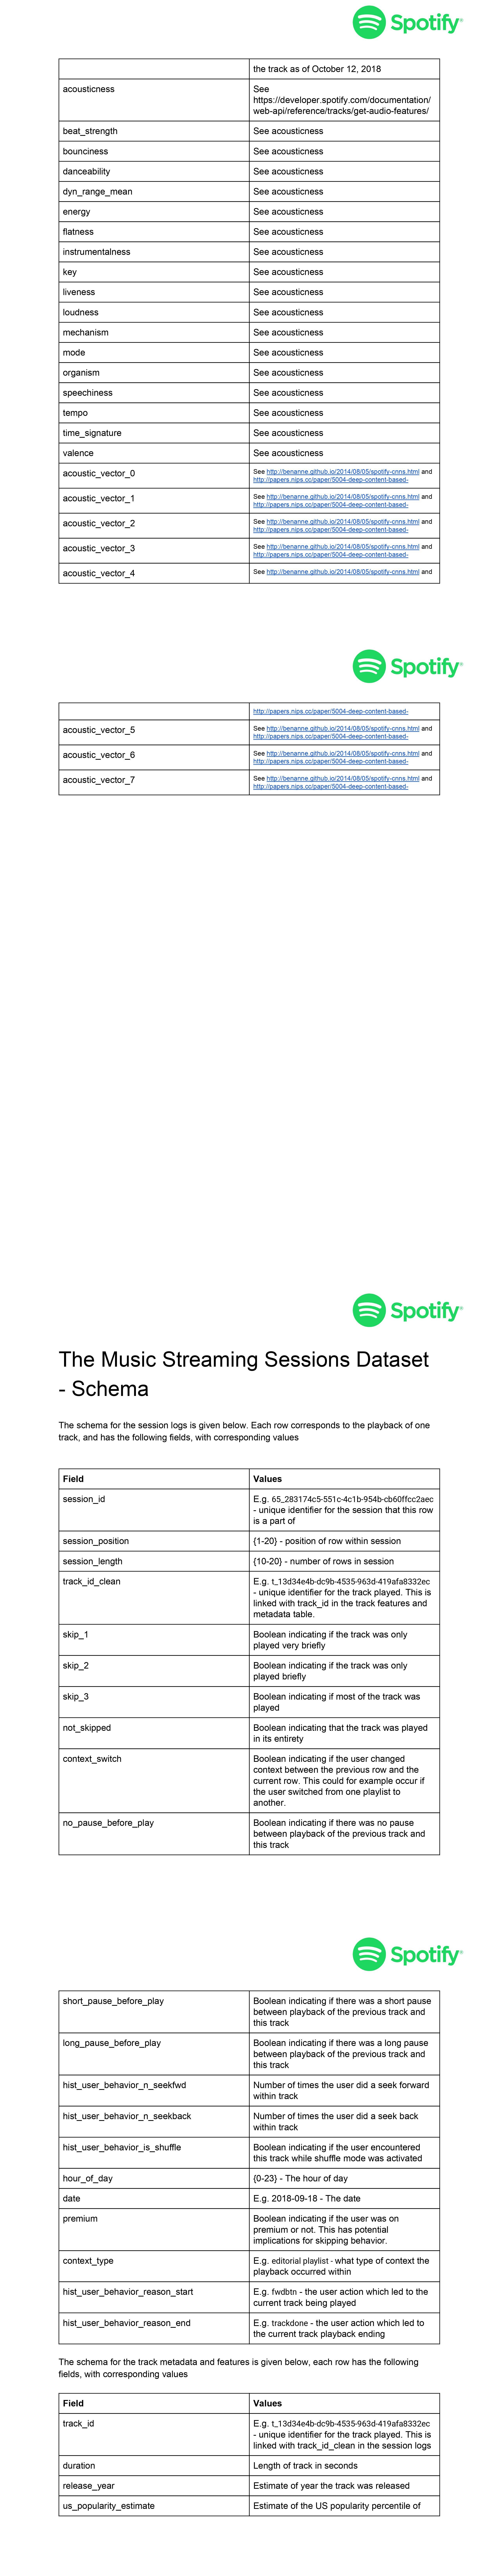

In [1]:
## This is for an `png` image
from IPython.display import Image
fig = Image(filename=('feature_description.jpg'))
fig

# Importing Relevant Libraries

In [2]:
#Importing the relevant libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
#from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lazypredict

import warnings
warnings.filterwarnings("ignore")

# Reading the Train Dataset

In [3]:
#reading the train datset and viewing it
spotify_train_ = pd.read_csv("technocolabs training set.csv")
spotify_train=spotify_train_
spotify_train


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0.0,0.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
spotify_train.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [5]:
spotify_train.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


# Feature Engineering and Data Wrangling

In [6]:
#Checking for NAN rows
spotify_train.isnull().sum()

session_id                         50705
session_position                   50706
session_length                     50706
track_id_clean                     50706
skip_1                             50706
skip_2                             50706
skip_3                             50706
not_skipped                        50706
context_switch                     50706
no_pause_before_play               50706
short_pause_before_play            50706
long_pause_before_play             50706
hist_user_behavior_n_seekfwd       50706
hist_user_behavior_n_seekback      50706
hist_user_behavior_is_shuffle      50706
hour_of_day                        50706
date                               50706
premium                            50706
context_type                       50706
hist_user_behavior_reason_start    50706
hist_user_behavior_reason_end      50706
dtype: int64

In [7]:
#dropping NAN Values because 50706 NAN values are present in the bottom rows of all the features
spotify_train.dropna(inplace=True)

In [8]:
# Imputing Binary columns with 1 and 0
spotify_train['skip_1'] = [1 if x =='True' else 0 for x in spotify_train['skip_1']]
spotify_train['skip_2'] = [1 if x =='True' else 0 for x in spotify_train['skip_1']]
spotify_train['skip_3'] = [1 if x =='True' else 0 for x in spotify_train['skip_1']]
spotify_train['premium'] = [1 if x =='True' else 0 for x in spotify_train['premium']]
spotify_train['hist_user_behavior_is_shuffle'] = [1 if x =='True' else 0 for x in spotify_train['hist_user_behavior_is_shuffle']]

#Creating a Skipped column for making prediction by reversing the not_skipped columns
spotify_train["Skipped"]=spotify_train["not_skipped"].replace({0:1, 1:0})

#making a new column to check if user uses seek bar while listening to songs 
conditions = [
    (spotify_train['hist_user_behavior_n_seekfwd'] > 0) & (spotify_train['hist_user_behavior_n_seekback'] >0),
    (spotify_train['hist_user_behavior_n_seekfwd'] == 0) & (spotify_train['hist_user_behavior_n_seekback'] ==0),
    ]
values = [1,0]
spotify_train["hist_user_seek_behavior"]=np.select(conditions, values)

#making a new column to identify the day time in a categorical format
conditions = [
    (spotify_train['hour_of_day'] >= 0) & (spotify_train['hour_of_day'] <=5),
    (spotify_train['hour_of_day'] > 5) & (spotify_train['hour_of_day'] <= 6),
    (spotify_train['hour_of_day'] > 6) & (spotify_train['hour_of_day'] <= 9),
    (spotify_train['hour_of_day'] > 9) & (spotify_train['hour_of_day'] <=12),
    (spotify_train['hour_of_day'] > 12) & (spotify_train['hour_of_day'] <=14),
    (spotify_train['hour_of_day'] > 14) & (spotify_train['hour_of_day'] <=17),
    (spotify_train['hour_of_day'] > 17) & (spotify_train['hour_of_day'] <=21),
    (spotify_train['hour_of_day'] > 21),
    ]

# create a list of the values we want to assign for each condition
values = ['dawn', 'early_morning', 'morning', 'mid_morning','noon','afternoon','evening','night']

# create a new column and use np.select to assign values to it using our lists as arguments
spotify_train['time_of_day'] = np.select(conditions, values)

#dropping the irrelevant columns
spotify_train=spotify_train.drop(["skip_1","skip_2","skip_3","not_skipped","session_id","short_pause_before_play","long_pause_before_play","hour_of_day","date"],axis=1)


In [9]:
#checking for imbalance
spotify_train['Skipped'].value_counts()
#almost 50% data is imbalanced

1    111996
0     55884
Name: Skipped, dtype: int64

In [10]:
#Dummy Encoding will vastly increase the total number of columns, hence I went for binary encoding techique

#dummy=spotify_train[["time_of_day","hist_user_behavior_reason_end","hist_user_behavior_reason_start","context_type"]]
#list_dummy=list(dummy.columns)
#for i in list_dummy:
    #dummy = pd.concat([dummy,pd.get_dummies(dummy[i], prefix=i,drop_first=True)],axis=1)
#train=pd.concat([spotify_train.drop(["time_of_day","hist_user_behavior_reason_end","hist_user_behavior_reason_start","context_type"],axis=1) ,dummy.drop(["time_of_day","hist_user_behavior_reason_end","hist_user_behavior_reason_start","context_type"],axis=1)],axis=1)


In [11]:
#Binary Encoding for the categorical columns
#!pip install category_encoders
import category_encoders as ce

dummy=spotify_train[["time_of_day","hist_user_behavior_reason_end","hist_user_behavior_reason_start","context_type"]]
encoder=ce.BinaryEncoder(cols=dummy.columns,return_df=True)
dummy_encoded=encoder.fit_transform(dummy) 
train=pd.concat([spotify_train.drop(["time_of_day","hist_user_behavior_reason_end","hist_user_behavior_reason_start","context_type"],axis=1) ,dummy_encoded],axis=1)

In [12]:
#importing the track features for merging
track_features_0 = pd.read_csv("track_features.csv")
track_features_1 = pd.read_csv("track_features1.csv")
#merging the track features along axis=0
track_features=pd.concat([track_features_0,track_features_1])
#merging the train and track_features along "track_id_clean" column
train=pd.merge(train, track_features, on="track_id_clean")

In [13]:
train.describe()

,session_position,session_length,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,Skipped,hist_user_seek_behavior,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.0,95257.0,95257.000000,95257.000000,...,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000
mean,9.332312,17.641969,0.041771,0.766096,0.039567,0.049687,0.0,0.0,0.667122,0.004840,...,3.946944,0.449199,-0.511485,0.267438,0.204579,-0.020231,-0.144338,0.049080,-0.284369,0.060426
std,5.468092,3.425564,0.200067,0.423314,0.411678,0.738606,0.0,0.0,0.471246,0.069399,...,0.353922,0.230958,0.386537,0.195774,0.165976,0.263417,0.306473,0.116835,0.292712,0.264570
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-0.962693,-0.942461,-0.731369,-0.975647
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,4.000000,0.271146,-0.833948,0.222741,0.171481,-0.172231,-0.333019,-0.028670,-0.487001,-0.018892
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,...,4.000000,0.426562,-0.655508,0.311700,0.235363,0.041803,-0.273780,0.039166,-0.375381,0.143839
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,...,4.000000,0.618261,-0.191163,0.374712,0.298663,0.133749,-0.039154,0.138741,-0.180734,0.195926
max,20.000000,20.000000,1.000000,1.000000,60.000000,151.000000,0.0,0.0,1.000000,1.000000,...,5.000000,0.994051,0.932165,0.812837,0.605288,1.074504,0.892262,0.380279,0.966420,1.106470


In [14]:
train.release_year.min()

1950

In [15]:
#Encoding the year feature
conditions = [
    (train['release_year'] >=1950) & (train['release_year'] <=1970),
    (train['release_year'] > 1970) & (train['release_year'] <= 1990),
    (train['release_year'] > 1990) & (train['release_year'] <= 2010),
    (train['release_year'] > 2010) & (train['release_year'] <=2015),
    (train['release_year'] > 2015) & (train['release_year'] <=2017),
    (train['release_year'] > 2017)
    ]

# create a list of the values we want to assign for each condition
values = ['very_old', 'old', 'relatively_old','new','mordern','latest']

# create a new column and use np.select to assign values to it using our lists as arguments
train['release_condition'] = np.select(conditions, values)

xxx=train[['release_condition']]
encoder1=ce.BinaryEncoder(cols=xxx.columns,return_df=True)
encoded=encoder1.fit_transform(xxx) 
train=pd.concat([train,encoded],axis=1)
train=train.drop(["release_year","release_condition"],axis=1)
train

,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,Skipped,...,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,release_condition_0,release_condition_1,release_condition_2,release_condition_3
0,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0,0,0,...,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,0,0,1
1,7.0,12.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0,0,1,...,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,0,0,1
2,6.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0,0,0,...,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,0,0,1
3,9.0,13.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,1.0,0.0,0.0,0,0,0,...,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,0,0,1
4,7.0,12.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0,0,1,...,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95252,12.0,20.0,t_987480f8-a048-4c5e-aac3-0bcad5290731,0.0,1.0,0.0,0.0,0,0,1,...,-0.072997,-0.528393,-0.009909,0.178357,-0.185356,0.364100,0,0,0,1
95253,14.0,20.0,t_1e86bfc8-4204-4645-8b00-7722efca192a,0.0,1.0,0.0,0.0,0,0,1,...,0.197736,-0.094862,-0.501758,0.166349,-0.030234,0.537973,0,1,0,1
95254,10.0,20.0,t_44a3360f-a06d-458a-91fc-4d9efa506697,0.0,0.0,0.0,0.0,0,0,1,...,0.218592,0.093307,-0.309999,-0.004573,-0.549420,0.219733,0,1,0,1
95255,16.0,20.0,t_3f71a175-f7ca-4cd4-829d-65fc82b09486,0.0,1.0,0.0,0.0,0,0,0,...,0.367541,0.026499,-0.370684,0.083014,-0.334056,0.097527,0,0,0,1


In [16]:
#dummy encoding the required columns and dropping the irrelevant columns
train=pd.concat([train.drop(["key","time_signature"],axis=1),pd.get_dummies(train["mode"], prefix="mode",drop_first=True)],axis=1)
train=train.drop(["mode",],axis=1)

In [17]:
train.columns

Index(['session_position', 'session_length', 'track_id_clean',
       'context_switch', 'no_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'premium', 'Skipped',
       'hist_user_seek_behavior', 'time_of_day_0', 'time_of_day_1',
       'time_of_day_2', 'time_of_day_3', 'hist_user_behavior_reason_end_0',
       'hist_user_behavior_reason_end_1', 'hist_user_behavior_reason_end_2',
       'hist_user_behavior_reason_end_3', 'hist_user_behavior_reason_start_0',
       'hist_user_behavior_reason_start_1',
       'hist_user_behavior_reason_start_2',
       'hist_user_behavior_reason_start_3',
       'hist_user_behavior_reason_start_4', 'context_type_0', 'context_type_1',
       'context_type_2', 'context_type_3', 'duration',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'liveness', 'loud

In [18]:
train.shape

(95257, 58)

# Exploratory Data Analysis

<AxesSubplot:xlabel='Skipped', ylabel='count'>

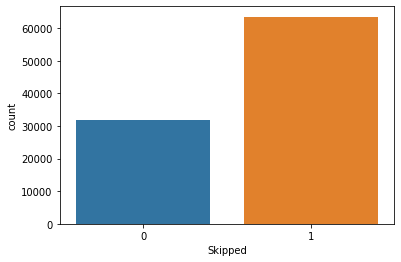

In [19]:
sns.countplot(x="Skipped",data=train[['Skipped']])

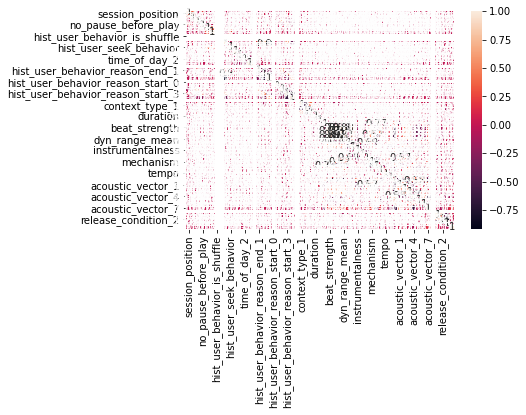

In [20]:
# Correlation matrix completely ignores any non-numeric column. 
sns.heatmap(train.corr(), annot=True)     #Checking for correlation between various features
plt.show()

In [21]:
train.describe()

,session_position,session_length,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,Skipped,hist_user_seek_behavior,...,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,release_condition_0,release_condition_1,release_condition_2,release_condition_3,mode_minor
count,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.0,95257.0,95257.000000,95257.000000,...,95257.000000,95257.000000,95257.000000,95257.000000,95257.000000,95257.0,95257.000000,95257.000000,95257.000000,95257.000000
mean,9.332312,17.641969,0.041771,0.766096,0.039567,0.049687,0.0,0.0,0.667122,0.004840,...,-0.020231,-0.144338,0.049080,-0.284369,0.060426,0.0,0.474999,0.448628,0.568809,0.336637
std,5.468092,3.425564,0.200067,0.423314,0.411678,0.738606,0.0,0.0,0.471246,0.069399,...,0.263417,0.306473,0.116835,0.292712,0.264570,0.0,0.499377,0.497357,0.495245,0.472562
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,-0.809136,-0.962693,-0.942461,-0.731369,-0.975647,0.0,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,-0.172231,-0.333019,-0.028670,-0.487001,-0.018892,0.0,0.000000,0.000000,0.000000,0.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,...,0.041803,-0.273780,0.039166,-0.375381,0.143839,0.0,0.000000,0.000000,1.000000,0.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,...,0.133749,-0.039154,0.138741,-0.180734,0.195926,0.0,1.000000,1.000000,1.000000,1.000000
max,20.000000,20.000000,1.000000,1.000000,60.000000,151.000000,0.0,0.0,1.000000,1.000000,...,1.074504,0.892262,0.380279,0.966420,1.106470,0.0,1.000000,1.000000,1.000000,1.000000


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95257 entries, 0 to 95256
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   session_position                   95257 non-null  float64
 1   session_length                     95257 non-null  float64
 2   track_id_clean                     95257 non-null  object 
 3   context_switch                     95257 non-null  float64
 4   no_pause_before_play               95257 non-null  float64
 5   hist_user_behavior_n_seekfwd       95257 non-null  float64
 6   hist_user_behavior_n_seekback      95257 non-null  float64
 7   hist_user_behavior_is_shuffle      95257 non-null  int64  
 8   premium                            95257 non-null  int64  
 9   Skipped                            95257 non-null  int64  
 10  hist_user_seek_behavior            95257 non-null  int32  
 11  time_of_day_0                      95257 non-null  int

In [23]:
#Defining the dependant and independant variables (dropping track_id_clean because it is irrelevant as we are trying to make predictions based on song features and properties)

X = train.drop(['track_id_clean','Skipped'], axis = 1)
Y = train[['Skipped']]


# Dealing with Class Imbalance

In [24]:
#Using SMOTE for oversampling the minority class
#!pip install imblearn
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE(sampling_strategy=1.0,random_state=2).fit_sample(X, Y) 

<AxesSubplot:xlabel='Skipped', ylabel='count'>

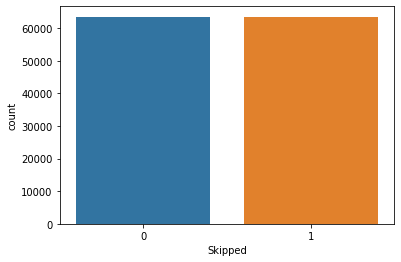

In [25]:
sns.countplot(x="Skipped",data=Y_resampled)

# Splitting the data into train and test sets

In [26]:
#Splitting the train and test data and scaling respectively
X_train, X_test,Y_train, Y_test=model_selection.train_test_split(X_resampled,Y_resampled,test_size=0.33,random_state=42,stratify=Y_resampled)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Feature Selection using Boruta

In [27]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=1)
 
forest.fit(X_train, Y_train)

# Apply The Full Featured Classifier To The Test Data
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score


ac = accuracy_score(Y_test, forest.predict(X_test))
fscore = f1_score(Y_test ,forest.predict(X_test))

# View The Accuracy Of Our Full Feature 
print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", fscore)

Baseline Model Accuracy: 0.9866959134042249
Baseline Model F1 Score: 0.9866019976949674


In [28]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(forest, n_estimators='auto',verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(Y_train))


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	56
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	47
Tentative: 	2
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	47
Tentative: 	2
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	47
Tentative: 	2
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	47
Tentative: 	2
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	47
Tentative: 	2
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	47
Tentative: 	2
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	47
Tentative: 	2
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	47
Tentative: 	2
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	47
Tentative: 	2
Rejected: 	7
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=195,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x28A3E201840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x28A3E201840, verbose=2)

In [36]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':boruta_selector.ranking_})
print(selected_rfe_features.sort_values(by='Ranking'))


#Storing the important features in the respective variables
X_important_train = boruta_selector.transform(X_train)
l=list(X_resampled.columns[boruta_selector.support_])
X_important_train=pd.DataFrame(data=X_important_train,columns=l)
X_important_test = boruta_selector.transform(X_test)
ll=list(X_resampled.columns[boruta_selector.support_])
X_important_test = pd.DataFrame(data=X_important_test,columns=ll)

                              Feature  Ranking
0                    session_position        1
29                      beat_strength        1
30                         bounciness        1
31                       danceability        1
32                     dyn_range_mean        1
33                             energy        1
34                           flatness        1
35                   instrumentalness        1
36                           liveness        1
37                           loudness        1
38                          mechanism        1
39                           organism        1
40                        speechiness        1
42                            valence        1
43                  acoustic_vector_0        1
44                  acoustic_vector_1        1
45                  acoustic_vector_2        1
46                  acoustic_vector_3        1
47                  acoustic_vector_4        1
48                  acoustic_vector_5        1
49           

# Training various models for selecting best model

In [ ]:
"""models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('RFC',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results=model_selection.cross_val_score(model, X_important_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %  (name, cv_results.mean(), cv_results.std())
    print(msg)"""

# Selecting SVM for the baseline model training

In [37]:
clf = SVC()
clf.fit(X_important_train,Y_train)
Y_pred = clf.predict(X_important_test)
print(accuracy_score(Y_test,Y_pred))

0.9913928758762101


# Checking with relevent metrics

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20971
           1       0.99      0.99      0.99     20971

    accuracy                           0.99     41942
   macro avg       0.99      0.99      0.99     41942
weighted avg       0.99      0.99      0.99     41942



<AxesSubplot:>

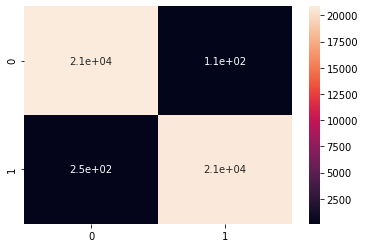

In [38]:
print(classification_report(Y_test,Y_pred))
cnf=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

# Hyper-Parameter Tunining (skipped this step as it is not required here and also the accurcy is good enough and also proper valdatio data is not present)

In [39]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
svm=SVC()
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly','sigmoid']}

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs = GridSearchCV(svm, parameters, cv=5,scoring='f1',n_jobs=-1,refit = True, verbose=2)
gs.fit(X_important_train, Y_train)
gs.best_params_"""

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import RepeatedStratifiedKFold\nsvm=SVC()\nparameters = {'C': [0.1, 1, 10, 100, 1000],  \n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], \n              'kernel': ['rbf','linear','poly','sigmoid']}\n\n#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\ngs = GridSearchCV(svm, parameters, cv=5,scoring='f1',n_jobs=-1,refit = True, verbose=2)\ngs.fit(X_important_train, Y_train)\ngs.best_params_"

# Creating a pickle file and storing it for deployment purposes

In [40]:
import pickle
pickle.dump(clf, open("techncolabs_model.pkl", 'wb'))

In [46]:
len(list(X_important_train.columns))

47